In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("ipl.csv")

In [3]:
data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [4]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(columns_to_remove, axis=1, inplace=True)


In [5]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
#Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [8]:
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [9]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [10]:
# to predict the score we have to have atleat 5 overs data or filtering the rest of data
data = data[data['overs']>=5]


In [11]:
data

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [12]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [14]:
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])

In [15]:
encoded_data

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# Rearranging the columns
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [17]:
encoded_data

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.1,106,9,29,4,107
75885,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.2,107,9,29,4,107
75886,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.3,107,9,28,4,107
75887,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.4,107,9,24,4,107


In [18]:
# Splitting the data into train and test set
X_train = encoded_data.drop('total', axis=1)[encoded_data['date'].dt.year <= 2016]
X_test = encoded_data.drop('total', axis=1)[encoded_data['date'].dt.year >= 2017]

y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values


In [19]:
# Removing the 'date' column
X_train.drop(labels='date', axis=1, inplace=True)
X_test.drop(labels='date', axis=1, inplace=True)


In [20]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [23]:
regressor.score(X_test,y_test)

0.7519522885796084

## ridge regresiion

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [25]:
ridge=Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,50]}

In [27]:
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.27836e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50489e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57944e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54481e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\hrithik\appdata\local\programs\

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 50]},
             scoring='neg_mean_squared_error')

In [28]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-328.34615829692007


In [29]:
prediction = ridge_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

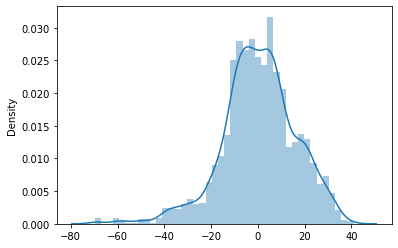

In [34]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [35]:
from sklearn import metrics
import numpy as np
print("MAE",metrics.mean_absolute_error(y_test,prediction))
print("MSE",metrics.mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(metrics.mean_absolute_error(y_test,prediction)))


MAE 12.116975720986485
MSE 251.03781533560803
RMSE 3.480944659282374


## lasso regesion

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso()


In [39]:
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4282396.494295021, tolerance: 2529.9556965945617
  model = cd_fast.enet_coordinate_descent(
c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4459696.004239025, tolerance: 2547.0380710286645
  model = cd_fast.enet_coordinate_descent(
c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4650637.090059386, tolerance: 2667.8126904366454
  model = cd_fast.enet_coordinate_descent(
c:\users\hrit

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 50]},
             scoring='neg_mean_squared_error')

In [40]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8263789858526


c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

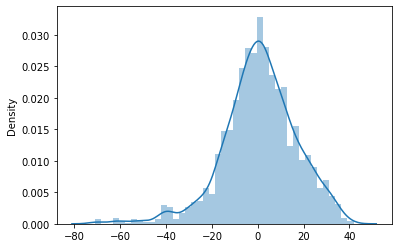

In [41]:
prediction = lasso_regressor.predict(X_test)
import seaborn as sns
sns.distplot(y_test-prediction)

In [42]:
print("MAE",metrics.mean_absolute_error(y_test,prediction))
print("MSE",metrics.mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(metrics.mean_absolute_error(y_test,prediction)))


MAE 12.214053814850246
MSE 262.37973664007154
RMSE 3.494861058017936


In [43]:
encoded_data

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.1,106,9,29,4,107
75885,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.2,107,9,29,4,107
75886,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.3,107,9,28,4,107
75887,2017-05-19,0,0,0,1,0,0,0,0,0,...,1,0,0,0,18.4,107,9,24,4,107


In [46]:
ridge_regressor.predict([[0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15,50,2,42,4]])

array([101.21395857])

In [44]:
X_test

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.5,58,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,18.1,106,9,29,4
75885,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,18.2,107,9,29,4
75886,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,18.3,107,9,28,4
75887,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,18.4,107,9,24,4
